In [4]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image.shape = (hieght, width, channels)
    width=image.shape[1] 
    height=image.shape[0]
    margin=50 
    # dots per inch
    dpi=100.
    # inches
    figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
    #axes ratio
    left = margin/dpi/figsize[0] 
    bottom = margin/dpi/figsize[1]
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
    # plt.figure(figsize=(6, 6))
    _ = plt.imshow(image, cmap=cmap)
    plt.title(kwargs.get("title", None))
    plt.axis("off")

### Erosion

- Definition - https://docs.opencv.org/2.4/doc/tutorials/imgproc/erosion_dilatation/erosion_dilatation.html
- Erosion - https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=erode#erode

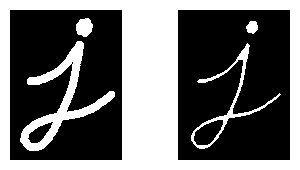

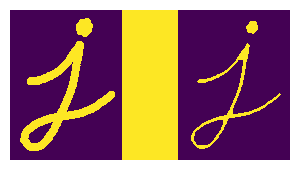

In [17]:
image = cv2.imread("j.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(image)
display(gray, flip=False)

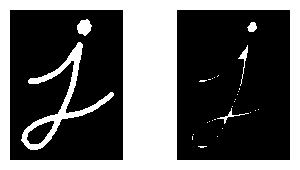

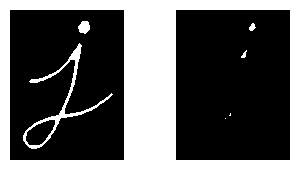

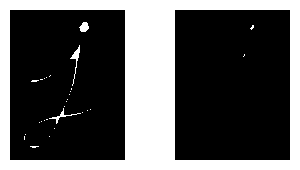

In [18]:
# erode the image 3 times

for i in range(0, 3):
    eroded = cv2.erode(gray.copy(), None, iterations=i+1)
    display(eroded, flip=False, cmap="gray")

### Dilation

- https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=dilate#dilate